In [3]:
using LinearAlgebra
using Distributions
using CSV
using DataFrames
using Plots
using Convex, SCS
using Krylov
using Hadamard
using SparseArrays
using ProgressBars

# 6.3

In [4]:
m = 100
n = 500

# Generate data
ω = rand(n)
x✶ = max.(ω, 0)
λ✶ = max.(-ω, 0)

A = rand(m, n)
ν✶ = rand(m)

b = A*x✶
c = -A'*ν✶ + λ✶

F = [A zeros(m,m) zeros(m,n); zeros(n,n) -A' ones(n,n); c' b' zeros(n)']
g = [b;c;0]

C(z) = [i <= n || i >= n+m ? max(0, xi) : xi for (i,xi) = enumerate(z)]
F_ = pinv(F)
A_(z) = z - F_*((F*z-g))

500-element Vector{Float64}:
 -25.845202744036317
 -26.63569647746298
 -23.170397517380433
 -26.428472531460045
 -28.55119778934809
 -27.635185812920234
 -25.299613438359003
 -27.301622653832393
 -25.60121842288794
 -27.97921212473723
   ⋮
 -26.82496706989519
 -27.999080087709114
 -29.182022069840844
 -26.459856070567216
 -27.355396751979608
 -25.318177699847844
 -26.188397636951002
 -23.837527257918943
 -27.527857657319938

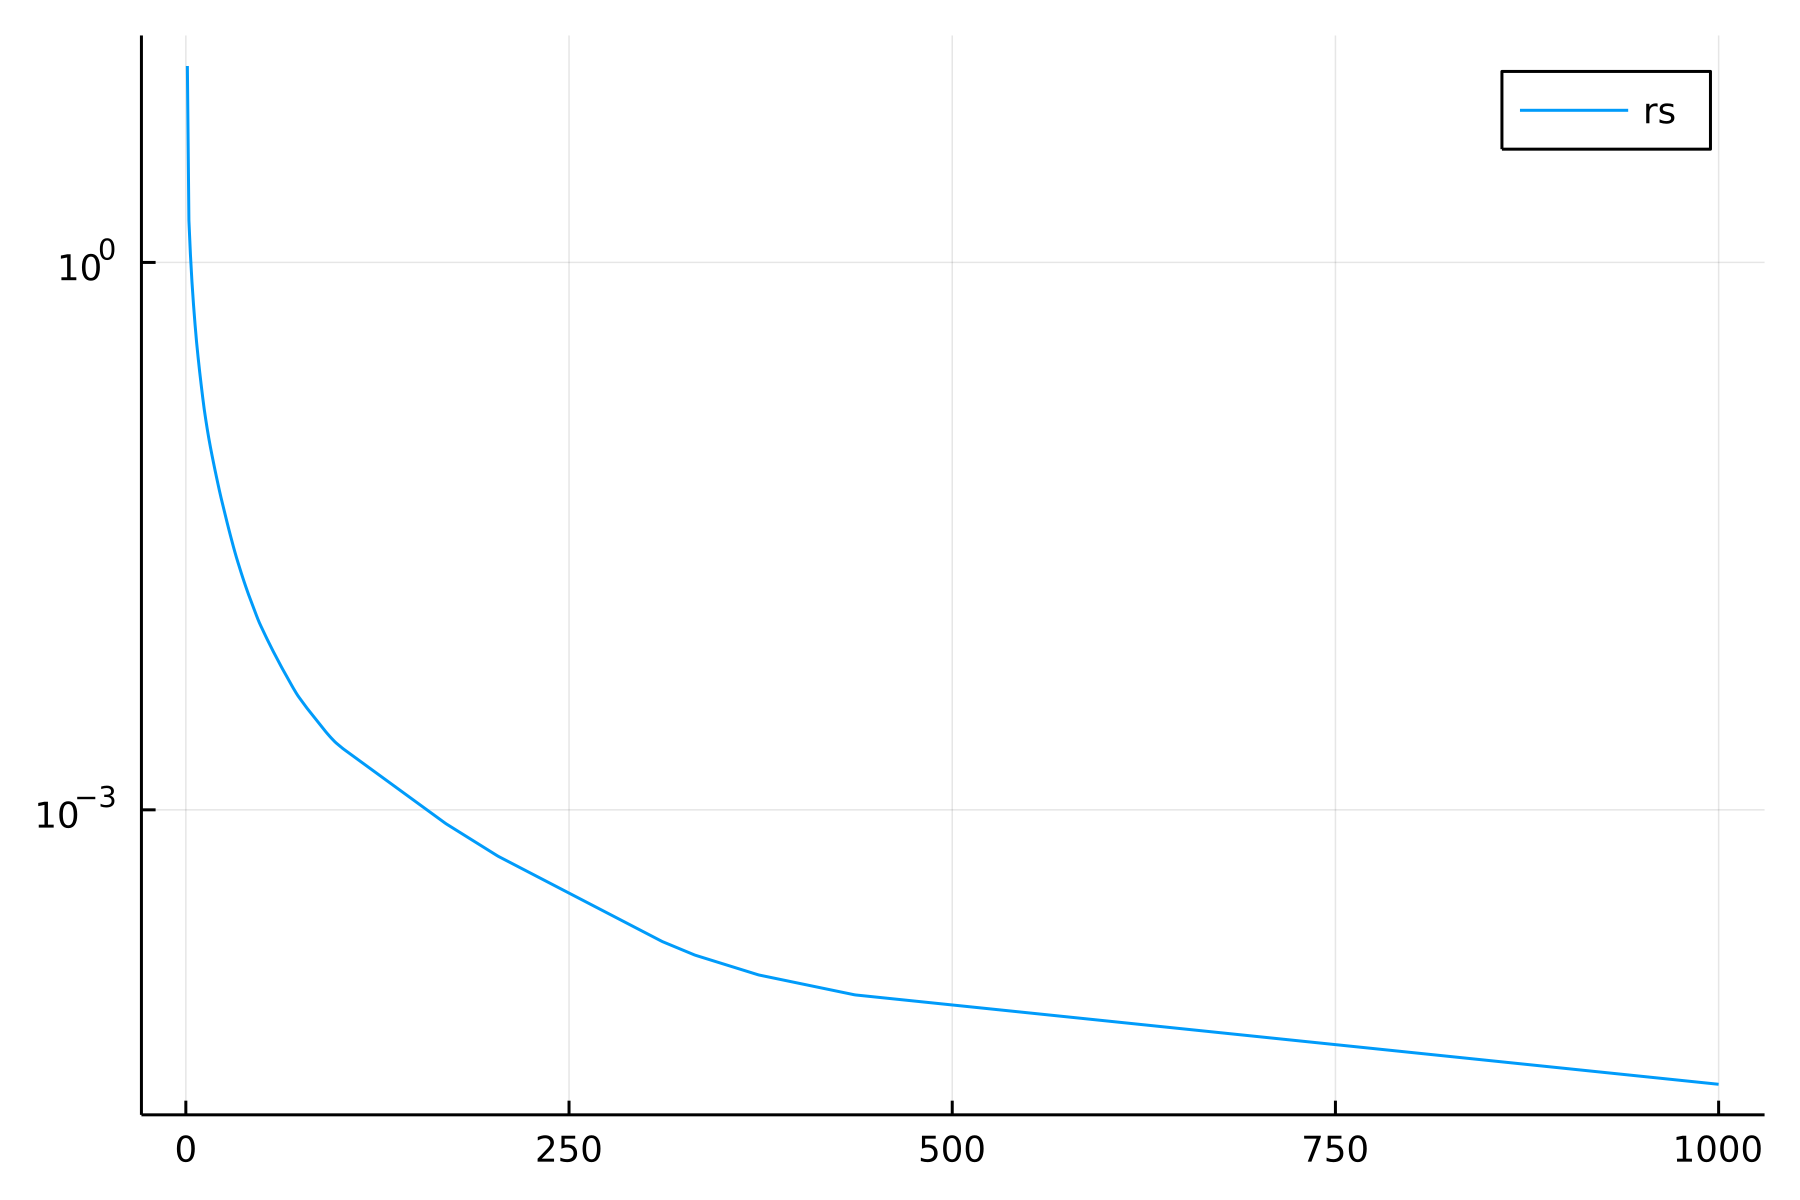

In [14]:
rs = []
z_s = []
zs = []

z = rand(2n + m) .- 0.5

for i = 1:1000
  z_ = C(z)
  z = A_(z_)

  push!(z_s, z_)
  push!(zs, z)
  push!(rs, norm(z-z_))
end
plot(rs,label="rs",yaxis=:log)
# minimum(rs)

In [69]:
minimum(rs)

6.207547794062938e-5

Now we implement Dykstra's algorithm.

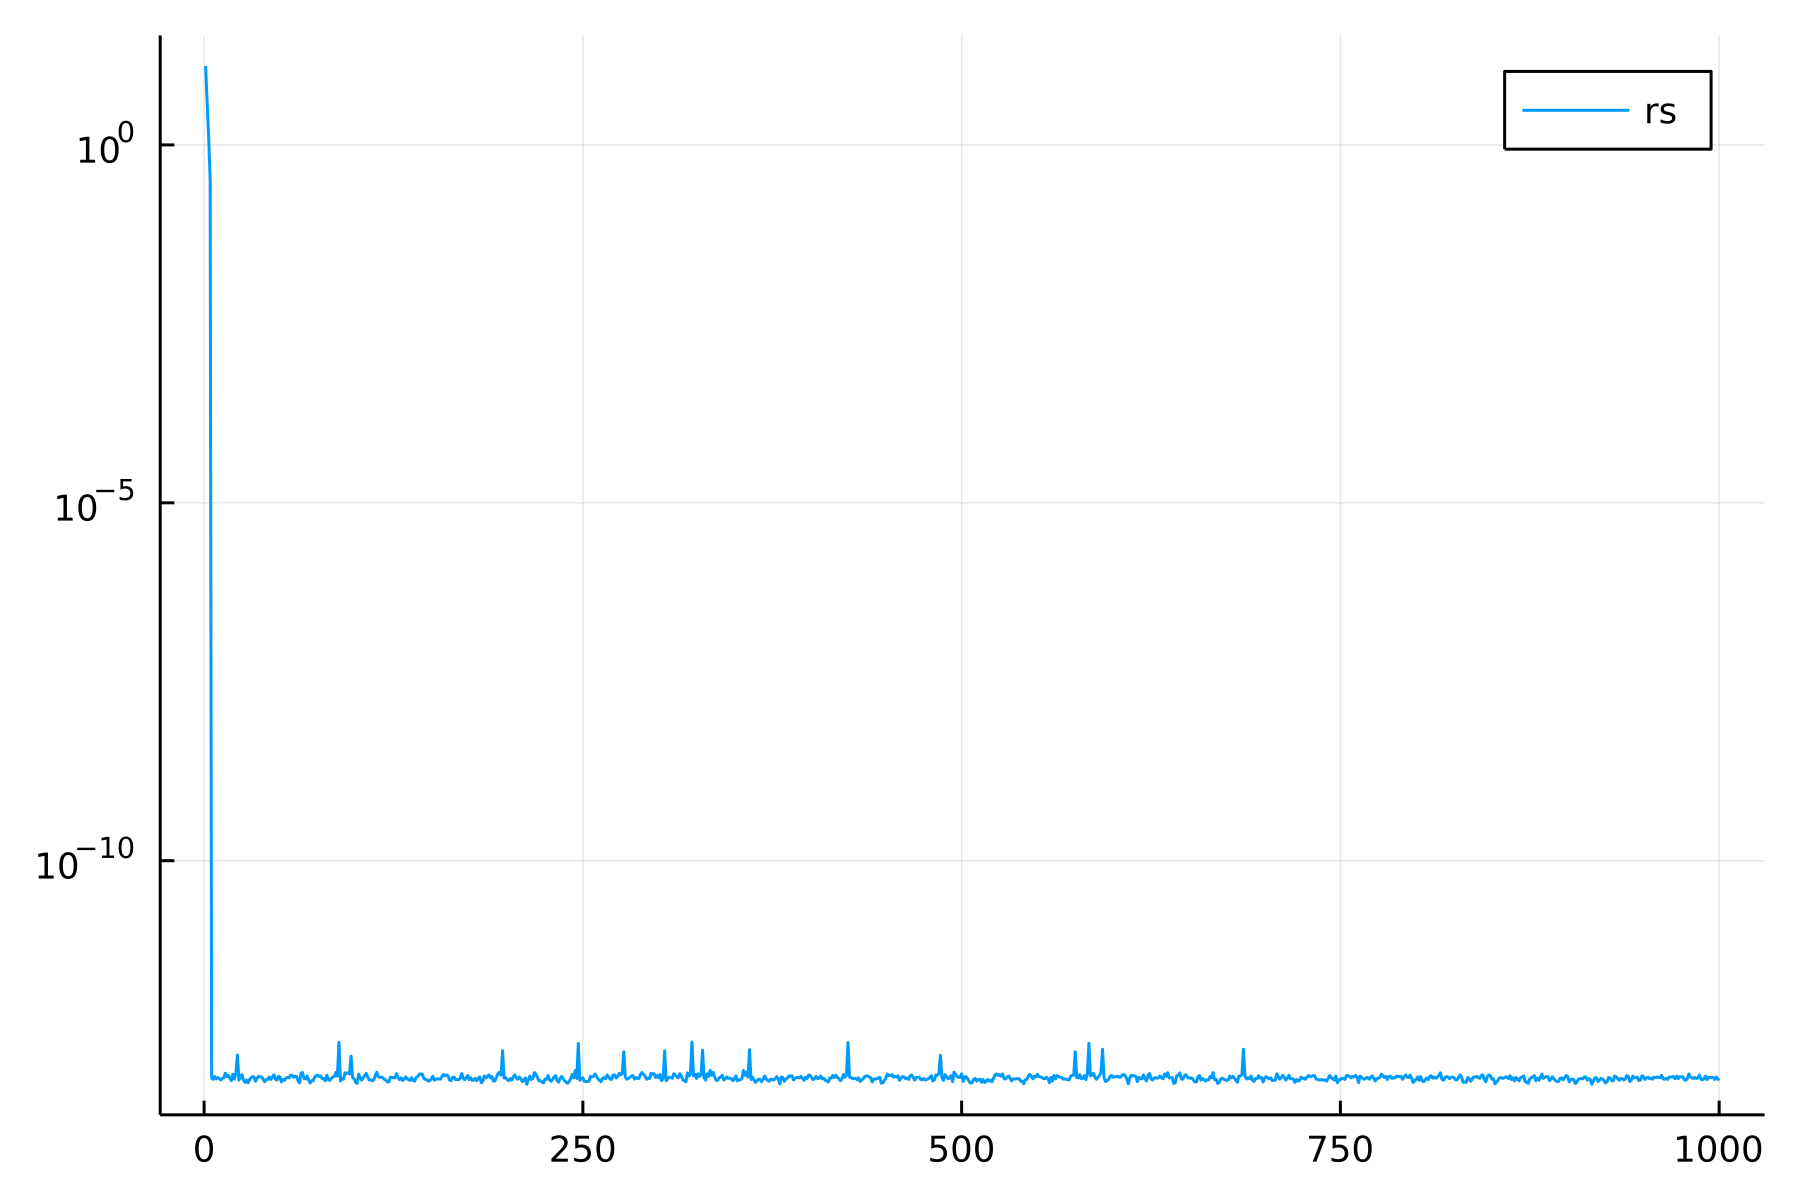

In [20]:
rs = []

z = rand(2n + m) .- 0.5
x = rand(2n + m) .- 0.5

for i = 1:1000
  x_ = C(z)
  z_ = 2*x_ - z
  x = A_(z_)
  z = z + x - x_

  push!(rs, norm(x-x_))
end
plot(rs,label="rs",yaxis=:log)

This converges faster than the regular alternating projections method.

# 6.4d

In [55]:
m, n = 2^12, 400
A = randn(m, n)*spdiagm(LinRange(.001, 100, n))
b = randn(m)

p = 20
H = hadamard(m)/sqrt(m)
S = Diagonal(rand(Uniform(-1,1), m))
ϕA = (H*S*A)[randperm(m)[1:n+p], :]
M_ = ϕA'*ϕA
M = inv(M_)

x, h = cg(A'*A, vec(A'*b); history=true)
xp, h = cg(A'*A, A'*b; history=true, M); 

In [53]:
b

4096-element Vector{Float64}:
 -0.7057120996640989
  1.3516183639058743
  0.25344330023616907
 -1.4216877231314022
 -0.19965565531448168
 -2.589153048118575
  1.7170760127888263
 -0.7277739239788251
 -0.6146220034622755
  1.1341494579699094
  ⋮
 -0.5766801572198705
  0.7856975870918147
  0.14048954500438807
 -0.7597350313541427
  0.8958714519364196
  0.10610768426042166
  0.06255740662365979
  0.030890333668960043
 -0.4939177995529296

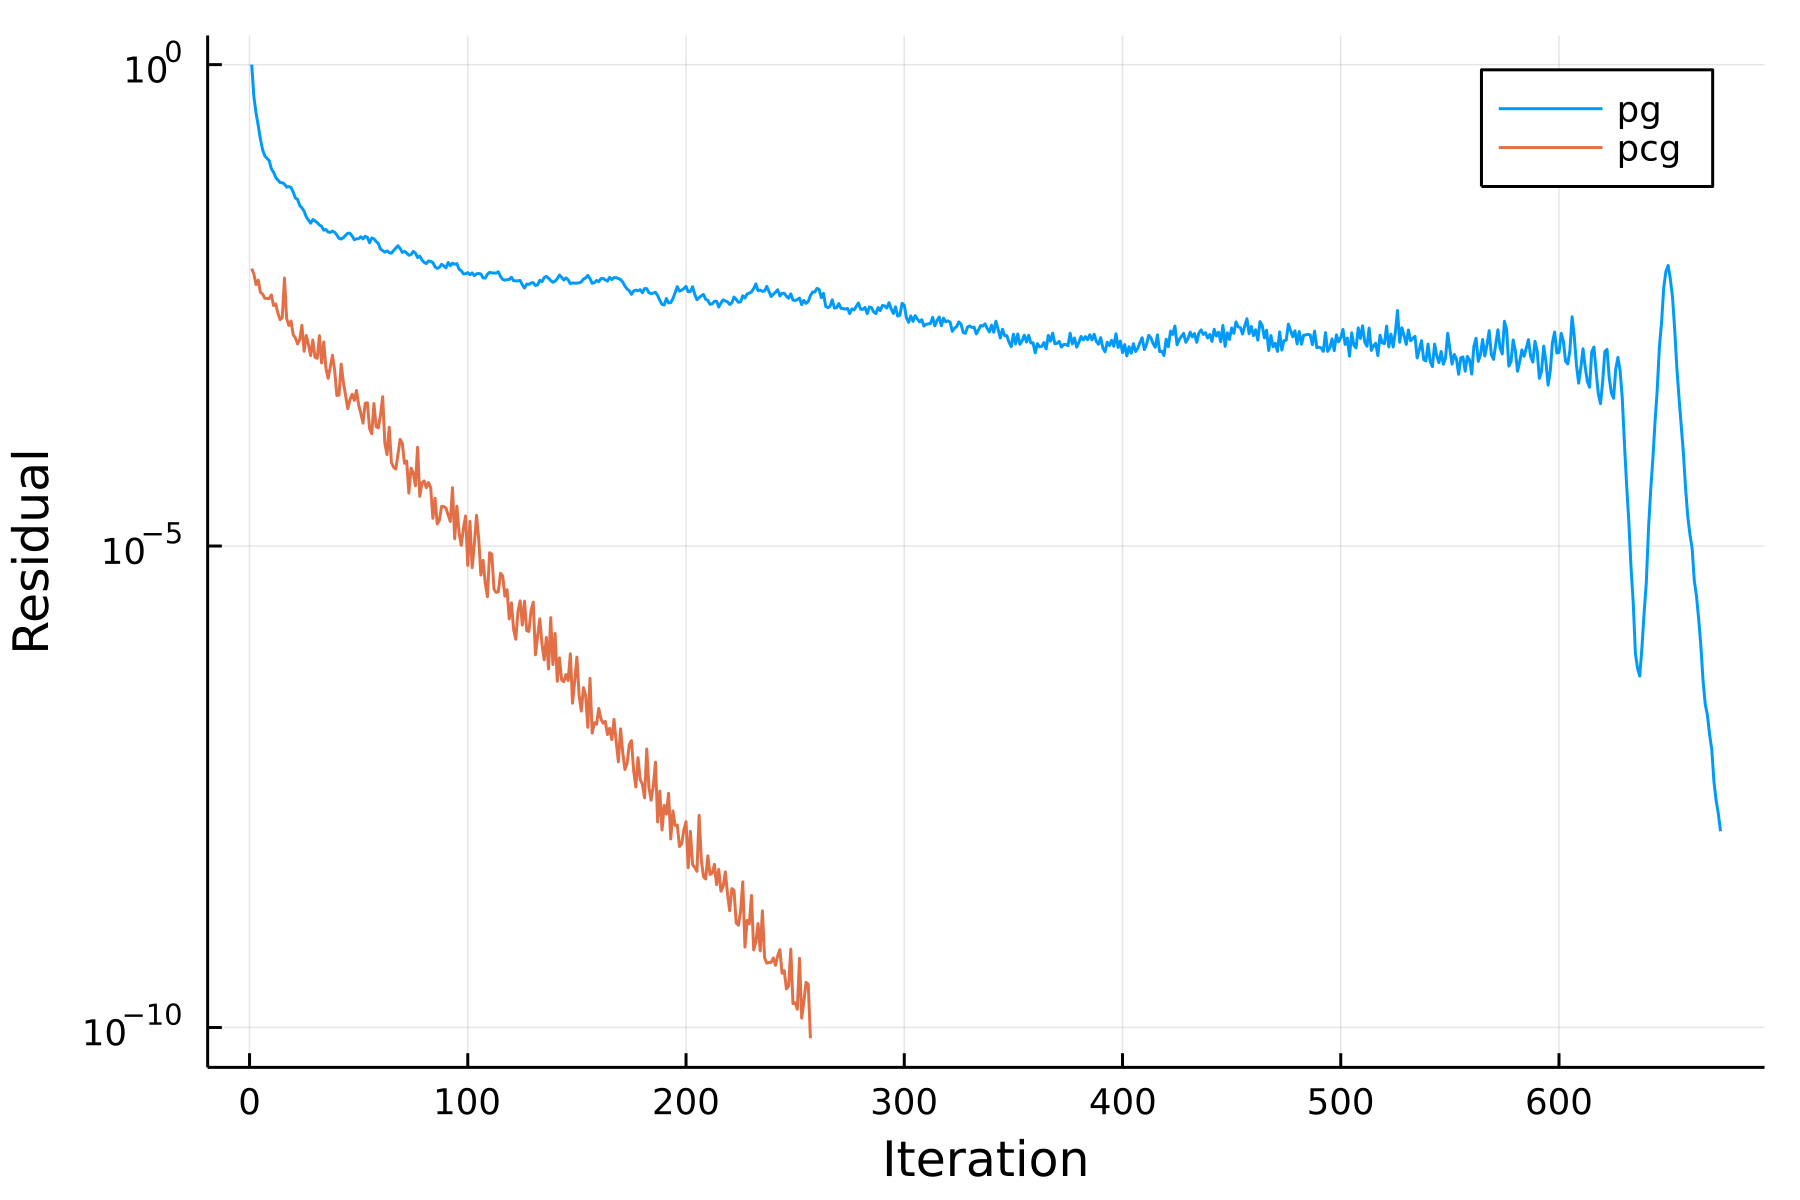

In [41]:
p = plot()
plot!(h.residuals./norm(A'*b), label="pg", yaxis=:log)
plot!(hp.residuals./norm(A'*b), label="pcg", yaxis=:log)
xlabel!("Iteration")
ylabel!("Residual")

In [39]:
cond(A'*A), cond(sqrt(M)*A'*A*sqrt(M))

(1.2876554945041666e10, 5754.225590751536)